# Guía 2

# Ejercicio 1
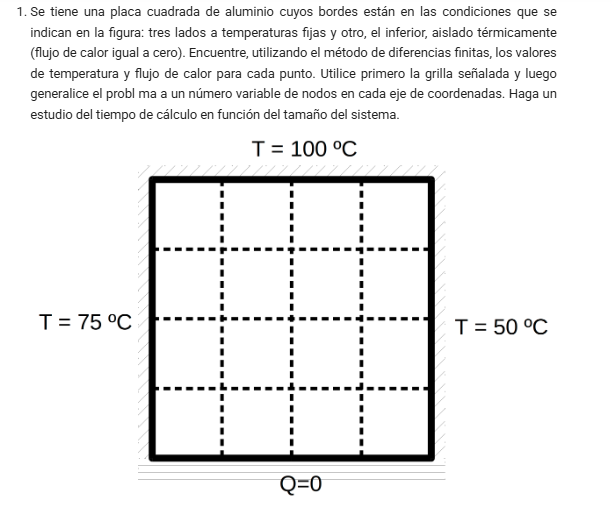

43.63980031013489


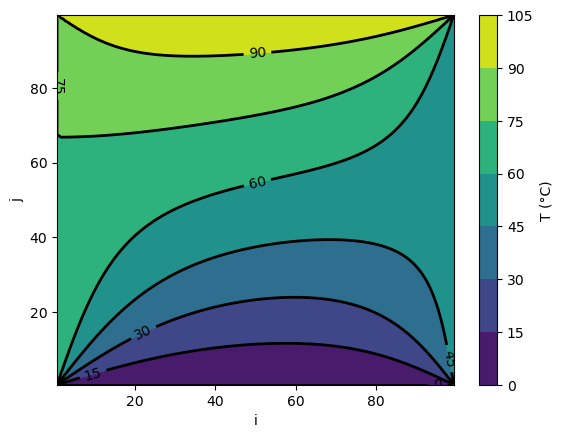

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Nx, Ny = espaciado de la malla
#cond_cont = Condiciones de contorno
#Tipo_cond_cort = Tipo de condiciones de contorno
def temp_chapa(cond_cont, Nx, Ny, tipo_cond_cont):
    beta = Nx/Ny
    b = np.zeros((Nx,Ny))
    #Defino los casos límite (las esquinas de la matriz) y guardo sus datos en un diccionario
    limites = {0: ['A','B', 0, -1], 1: ['B','C',-1,-1], 2:['C','D',-1,0],3: ['D','A',0,0]}
    for i in range(4):
        if tipo_cond_cont[limites[i][0]] == 'temp' and tipo_cond_cont[limites[i][1]] == 'flux':
            b[limites[i][2],limites[i][3]] = cond_cont[limites[i][0]]
        elif tipo_cond_cont[limites[i][1]] == 'temp' and tipo_cond_cont[limites[i][0]] == 'flux':
            b[limites[i][2],limites[i][3]] = cond_cont[limites[i][1]]
        elif tipo_cond_cont[limites[i][0]] == 'temp' and tipo_cond_cont[limites[i][1]] == 'temp':
            b[limites[i][2],limites[i][3]] = (cond_cont[limites[i][0]] + cond_cont[limites[i][1]])/2
    b[0, 1:Nx-1] = cond_cont['A']
    b[1:Ny-1,-1] = cond_cont['B']
    b[-1, 1:Nx-1] = cond_cont['C'] 
    b[1:Ny-1,0] = cond_cont['D']

    b = b.flatten()

    filas_int = np.arange(1,Ny-1)
    colum_int = np.arange(1,Nx-1)

    indices_filas_int, indices_colum_int = np.meshgrid(filas_int, colum_int, indexing = 'ij')
    flat_indices = np.ravel_multi_index((indices_filas_int.flatten(), indices_colum_int.flatten()),(Nx,Ny))

    A = np.eye(Nx*Ny)
    A[flat_indices,flat_indices] = -2*(1+beta**2)
    A[flat_indices,flat_indices+1] = 1
    A[flat_indices,flat_indices-1] = 1
    A[flat_indices,flat_indices+Nx] = beta**2
    A[flat_indices,flat_indices-Nx] = beta**2

    res = np.linalg.solve(A,b)

    return A, b, res

cond_cont = {'A':100,'B':50,'C':0,'D':75}
tipo_cond_cont = {'A':'temp','B':'temp','C':'temp','D':'temp'}
Nx = 100
Ny = 100

t1 = time.time()
A, b, T = temp_chapa(cond_cont, Nx, Ny, tipo_cond_cont)
t2 = time.time() - t1

fig,ax = plt.subplots()
mappable = ax.contourf(T.reshape(Nx,Ny),origin = 'upper')
levels = ax.contour(T.reshape(Nx,Ny), colors= 'k', linewidths = 2, origin = 'upper')
cbar = plt.colorbar(mappable)
cbar.set_label('T (°C)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')

print(t2)


# Ejercicio 2
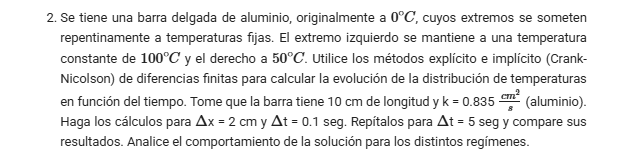